# IMPORTING PACKAGES & READING .csv FILES

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cu=pd.read_csv('customers_cleaned.csv')
odr=pd.read_csv('orders_cleaned.csv', parse_dates=['order_datetime'])
prd=pd.read_csv('products_cleaned.csv')
rt_rf=pd.read_csv('returns_refund_cleaned.csv', parse_dates=['date'])
dv=pd.read_csv('delievry_cleaned.csv')
rt=pd.read_csv('ratings_cleaned.csv')
tra=pd.read_csv('transactions_cleaned.csv')
sup=pd.read_csv('supplires_cleaned.csv')

In [4]:
conn=sqlite3.connect(':memory:')

In [5]:
odr.to_sql('orders',conn,index=False,if_exists='replace')

10000

In [6]:
query=""" 
            select month,count(or_id) 
            from orders
            group by month
    """
df=pd.read_sql_query(query,conn)
print(df)

       month  count(or_id)
0   Apr-2023           416
1   Apr-2024           410
2   Aug-2023           408
3   Aug-2024           422
4   Dec-2023           457
5   Dec-2024           425
6   Feb-2023           403
7   Feb-2024           423
8   Jan-2023           429
9   Jan-2024           423
10  Jul-2023           397
11  Jul-2024           440
12  Jun-2023           399
13  Jun-2024           422
14  Mar-2023           445
15  Mar-2024           425
16  May-2023           406
17  May-2024           397
18  Nov-2023           450
19  Nov-2024           418
20  Oct-2023           391
21  Oct-2024           398
22  Sep-2023           376
23  Sep-2024           420


C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\586226834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count(or_id)', data=df, palette='coolwarm')


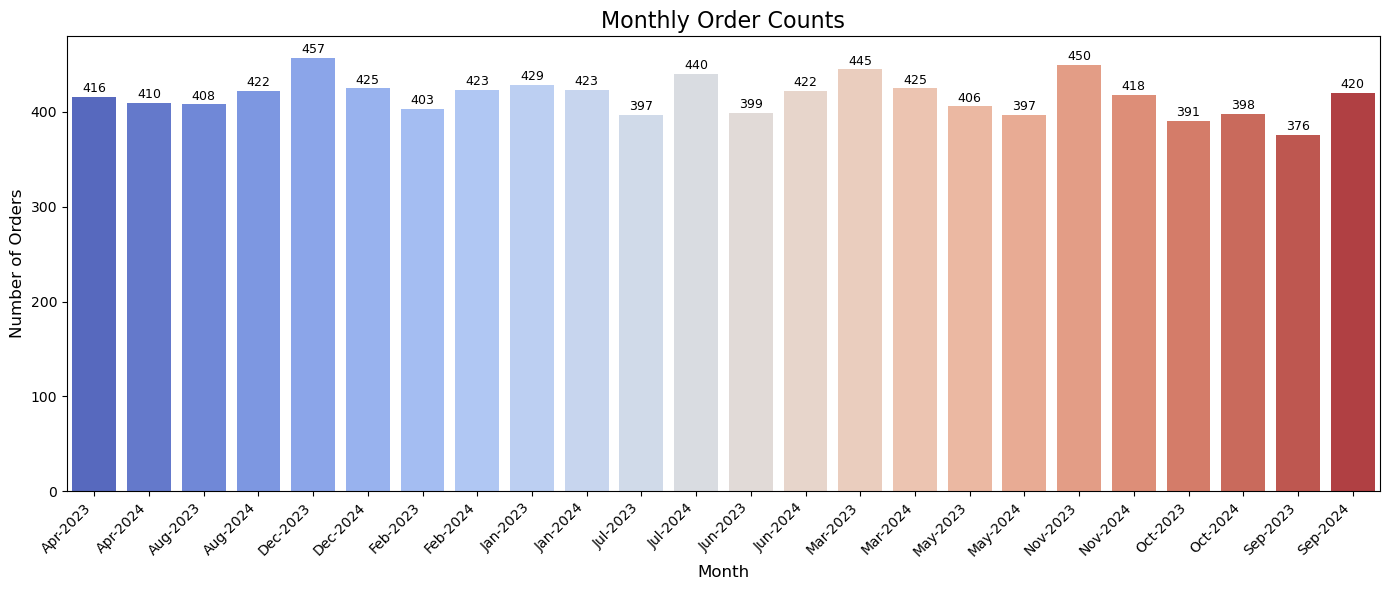

In [7]:
plt.figure(figsize=(14, 6))
sns.barplot(x='month', y='count(or_id)', data=df, palette='coolwarm')
plt.title('Monthly Order Counts', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate bars
for bar, count in zip(plt.gca().patches, df['count(or_id)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             str(count), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


In [8]:
cu.to_sql('customers',conn,index=False,if_exists='replace')

10000

In [9]:
query=""" 
            select state,count(c_id)
            from customers
            group by state
    """
df=pd.read_sql_query(query,conn)
print(df)

             state  count(c_id)
0   andhra pradesh          498
1            bihar          518
2            delhi          474
3          gujarat         1571
4        karnataka          477
5   madhya pradesh          965
6      maharashtra         1949
7        rajasthan          525
8       tamil nadu          517
9        telangana          512
10   uttar pradesh         1501
11     west bengal          493


C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\4273654805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state',y='count(c_id)', data=df,palette='viridis')


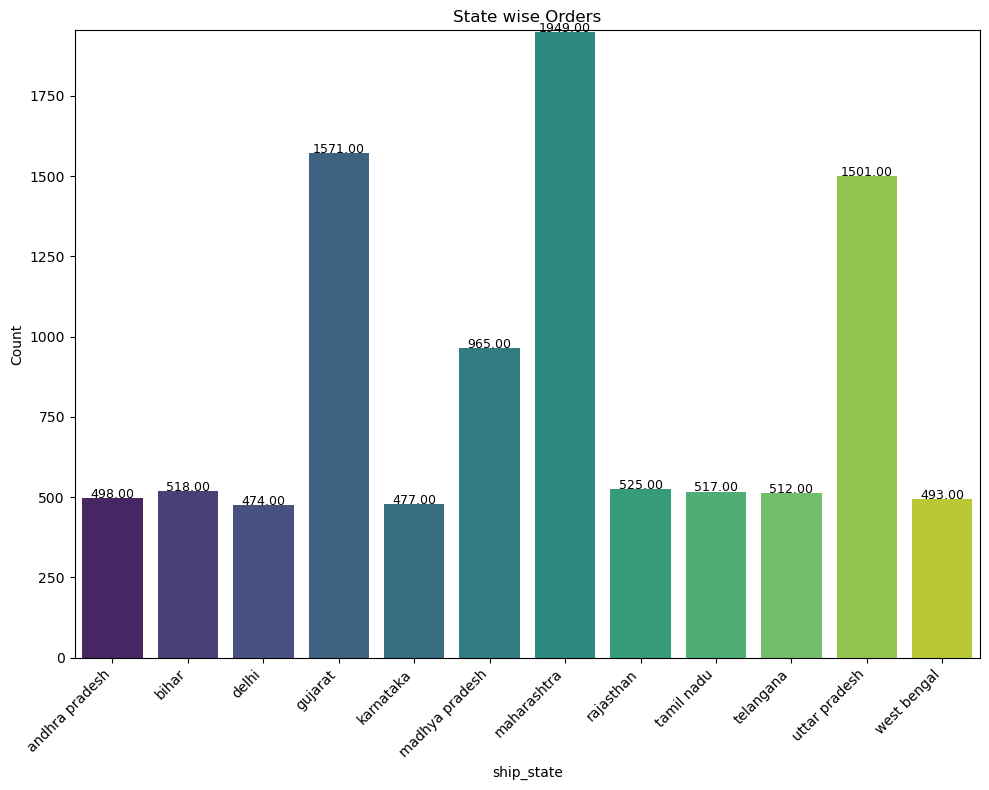

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x='state',y='count(c_id)', data=df,palette='viridis')
plt.title('State wise Orders')
plt.xlabel('ship_state')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.ylim(0, df['count(c_id)'].max() + 5)
plt.xticks(rotation=45, ha='right')

# Annotate bars
for bar, rate in zip(plt.gca().patches, df['count(c_id)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f"{rate:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [11]:
prd.to_sql('products',conn,index=False,if_exists='replace')

10000

In [12]:
query=""" 
            select category,count(p_id)
            from products
            group by category
    """
df=pd.read_sql_query(query,conn)
print(df)

         category  count(p_id)
0           books         1949
1     electronics         2026
2         fashion         2058
3         fitness         1981
4  home appliance         1986


C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\2783276987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category',y='count(p_id)', data=df,palette='viridis')


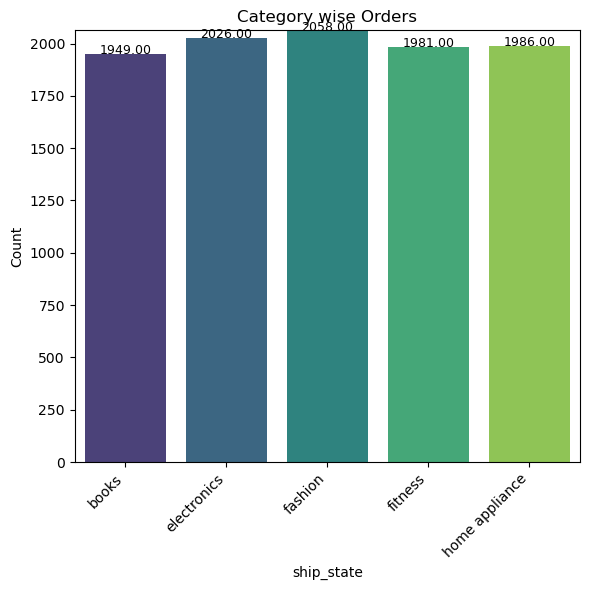

In [13]:
plt.figure(figsize=(6, 6))
sns.barplot(x='category',y='count(p_id)', data=df,palette='viridis')
plt.title('Category wise Orders')
plt.xlabel('ship_state')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.ylim(0, df['count(p_id)'].max() + 5)
plt.xticks(rotation=45, ha='right')

# Annotate bars
for bar, rate in zip(plt.gca().patches, df['count(p_id)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f"{rate:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [14]:
odr.info(),rt_rf.info(),cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   or_id           10000 non-null  object        
 1   c_id            10000 non-null  object        
 2   p_id            10000 non-null  object        
 3   order_date      10000 non-null  object        
 4   order_time      10000 non-null  object        
 5   qty             10000 non-null  int64         
 6   coupon          4989 non-null   object        
 7   dp_id           10000 non-null  object        
 8   order_datetime  10000 non-null  datetime64[ns]
 9   month           10000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0 

(None, None, None)

# Return Rate

In [16]:
# Merge returns with orders_products on 'or_id'
returns_full = pd.merge(rt_rf, odr, on="or_id", how="left")
returns_full = pd.merge(returns_full, prd, on="or_id", how="left")
returns_full = pd.merge(returns_full, cu, on='c_id', how='left')
returns_full = pd.merge(returns_full, sup, on='sup_id', how='left')
print(returns_full.head())

          rt_id        or_id              reason  status       date  \
0  rr_301000001  or_31004141  wrong item shipped  return 2023-08-04   
1  rr_301000001  or_31004141  wrong item shipped  return 2023-08-04   
2  rr_301000001  or_31004141  wrong item shipped  return 2023-08-04   
3  rr_301000002  or_31008145       late delivery  refund 2024-05-13   
4  rr_301000003  or_31005212  wrong item shipped  return 2023-01-11   

          c_id       p_id_x  order_date order_time  qty  ...   specs1   price  \
0  cs_11008396  pd_21001601  09-11-2023   04:04:57    9  ...  trouble   67.51   
1  cs_11008396  pd_21001601  09-11-2023   04:04:57    9  ...   dinner  263.74   
2  cs_11008396  pd_21001601  09-11-2023   04:04:57    9  ...     risk  367.06   
3  cs_11007340  pd_21005382  18-08-2024   12:04:22   10  ...    stock  318.82   
4  cs_11008792  pd_21002110  28-09-2023   10:06:16    9  ...     high  144.31   

         c_name  gender age       city      state  \
0    ubika anne  female  18  ahme

In [17]:
### --- CATEGORY LEVEL --- ###
# Total orders per category
total_orders_cat = prd.groupby("category")["or_id"].nunique()

# Returned orders per category
returned_orders_cat = returns_full.groupby("category")["or_id"].nunique()

# Convert series to DataFrame
total_orders_cat_df = total_orders_cat.reset_index()
total_orders_cat_df.columns = ["category", "total_orders"]

returned_orders_cat_df = returned_orders_cat.reset_index()
returned_orders_cat_df.columns = ["category", "returned_orders"]

# Merge both counts
category_merge = pd.merge(total_orders_cat_df, returned_orders_cat_df, on="category", how="left")

# Fill NaN returned_orders with 0 (in case some categories had no returns)
category_merge["returned_orders"] = category_merge["returned_orders"].fillna(0).astype(int)

# Calculate return rate
category_merge["return_rate_percent"] = (category_merge["returned_orders"] / category_merge["total_orders"]) * 100

# Optional: round percentage to 2 decimal places
category_merge["return_rate_percent"] = category_merge["return_rate_percent"].round(2)

# Print result
print("\n=== Return Summary by Category ===")
print(category_merge)

#category_merge.to_csv('return%_category.csv',index=False)


=== Return Summary by Category ===
         category  total_orders  returned_orders  return_rate_percent
0           books          1768              303                17.14
1     electronics          1826              339                18.57
2         fashion          1852              365                19.71
3         fitness          1792              332                18.53
4  home appliance          1803              344                19.08


C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\1574937606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='return_rate_percent', data=category_merge, palette='viridis')


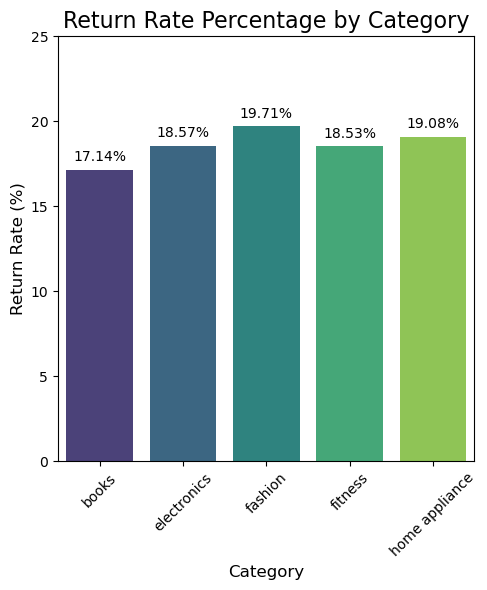

In [18]:
plt.figure(figsize=(5, 6))
sns.barplot(x='category', y='return_rate_percent', data=category_merge, palette='viridis')
plt.title('Return Rate Percentage by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.ylim(0, 25)
plt.xticks(rotation=45)

# Annotate bars
for index, row in category_merge.iterrows():
    plt.text(index, row['return_rate_percent'] + 0.5, f"{row['return_rate_percent']}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
### --- SUPPLIER LEVEL --- ###
# Total orders per supplier
total_orders_sup = prd.groupby("sup_id")["or_id"].nunique()

# Returned orders per supplier
returned_orders_sup = returns_full.groupby("sup_id")["or_id"].nunique()

# Step 1: Convert total and returned orders into DataFrames
total_orders_sup_df = total_orders_sup.reset_index()
total_orders_sup_df.columns = ["sup_id", "total_orders"]

returned_orders_sup_df = returned_orders_sup.reset_index()
returned_orders_sup_df.columns = ["sup_id", "returned_orders"]

# Step 2: Merge total and returned counts
supplier_merge = pd.merge(total_orders_sup_df, returned_orders_sup_df, on="sup_id", how="left")

# Fill missing returned_orders with 0
supplier_merge["returned_orders"] = supplier_merge["returned_orders"].fillna(0).astype(int)

# Step 3: Calculate return rate
supplier_merge["return_rate_percent"] = (supplier_merge["returned_orders"] / supplier_merge["total_orders"]) * 100
supplier_merge["return_rate_percent"] = supplier_merge["return_rate_percent"].round(2)

# Step 4: Load supplier names
suppliers_df = pd.read_csv("supplires_cleaned.csv")

# Step 5: Merge sup_name into the summary
supplier_merge = pd.merge(supplier_merge, suppliers_df[["sup_id", "sup_name"]], on="sup_id", how="left")

# Step 6: Reorder columns for better readability
supplier_merge = supplier_merge[["sup_id", "sup_name", "total_orders", "returned_orders", "return_rate_percent"]]

# Print the final summary
print("\n=== Return Summary by Supplier ===")
print(supplier_merge)

#supplier_merge.to_csv('return%_supplier.csv',index=False)


=== Return Summary by Supplier ===
     sup_id                 sup_name  total_orders  returned_orders  \
0   sup_001     global ecom supplies           331               56   
1   sup_002       primelogix traders           314               55   
2   sup_003    digicart distributors           342               60   
3   sup_004          urbanmarket co.           358               53   
4   sup_005        ezyshop solutions           336               64   
5   sup_006    quickpick wholesalers           372               79   
6   sup_007       nextwave merchants           337               55   
7   sup_008         trendify traders           363               64   
8   sup_009       shopease suppliers           331               60   
9   sup_010      smartkart wholesale           323               62   
10  sup_011       omnisupply network           301               49   
11  sup_012          ecomedge retail           307               58   
12  sup_013      swiftdeal suppliers     

C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\3113133671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sup_name', y='return_rate_percent', data=supplier_merge, palette='viridis')


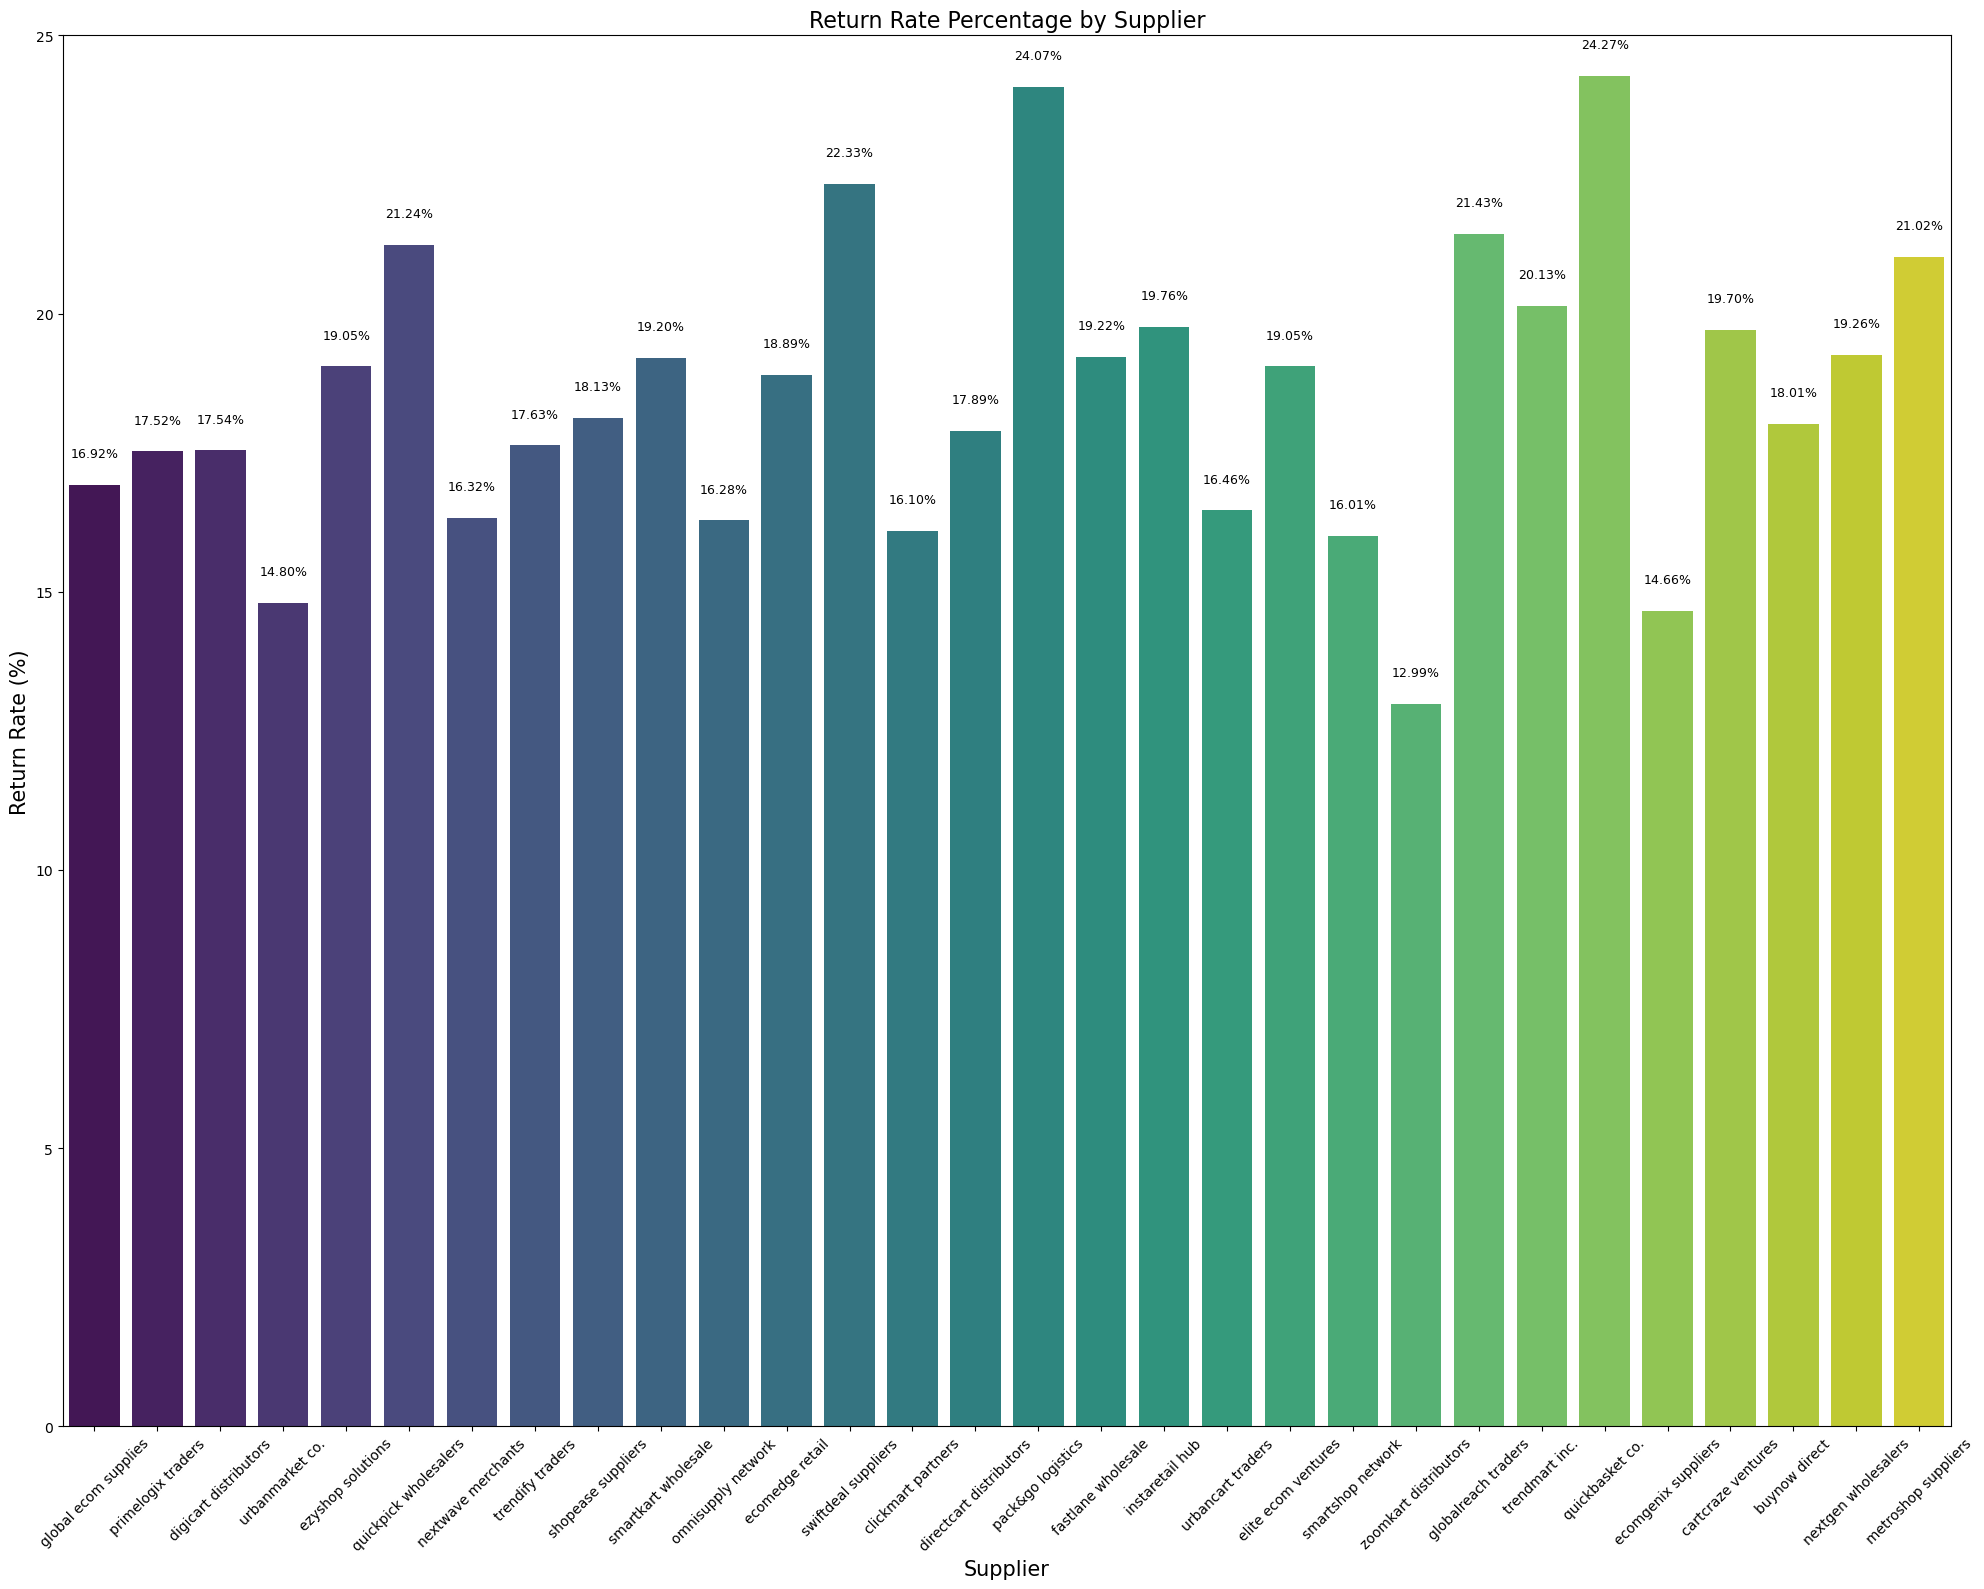

In [20]:
plt.figure(figsize=(20, 16))
sns.barplot(x='sup_name', y='return_rate_percent', data=supplier_merge, palette='viridis')
plt.title('Return Rate Percentage by Supplier', fontsize=16)
plt.xlabel('Supplier', fontsize=15)
plt.ylabel('Return Rate (%)', fontsize=15)
plt.ylim(0, 25)
plt.xticks(rotation=45)

# Annotate bars
for bar, rate in zip(plt.gca().patches, supplier_merge['return_rate_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f"{rate:.2f}%", ha='center', fontsize=9)
plt.tight_layout()
plt.show()


In [21]:
### --- STATE LEVEL --- ###
# Total orders per state (need to merge orders + customers)
orders_with_customers = pd.merge(odr, cu[['c_id', 'state']], on='c_id', how='left')

total_orders_state = orders_with_customers.groupby("state")["or_id"].nunique()
returned_orders_state = returns_full.groupby("state")["or_id"].nunique()

# Step 1: Merge orders with customers to get state info
orders_with_customers = pd.merge(odr, cu[['c_id', 'state']], on='c_id', how='left')

# Step 2: Total orders per state
total_orders_state = orders_with_customers.groupby("state")["or_id"].nunique().reset_index()
total_orders_state.columns = ["state", "total_orders"]

# Step 3: Returned orders per state
returned_orders_state = returns_full.groupby("state")["or_id"].nunique().reset_index()
returned_orders_state.columns = ["state", "returned_orders"]

# Step 4: Merge both
state_merge = pd.merge(total_orders_state, returned_orders_state, on="state", how="left")

# Step 5: Handle missing values (no returns in a state)
state_merge["returned_orders"] = state_merge["returned_orders"].fillna(0).astype(int)

# Step 6: Calculate return rate
state_merge["return_rate_percent"] = (state_merge["returned_orders"] / state_merge["total_orders"]) * 100
state_merge["return_rate_percent"] = state_merge["return_rate_percent"].round(2)

# Step 7: Print the result
print("\n=== Return Summary by State ===")
print(state_merge)

#state_merge.to_csv('return%_state.csv',index=False)


=== Return Summary by State ===
             state  total_orders  returned_orders  return_rate_percent
0   andhra pradesh           554              107                19.31
1            bihar           510               92                18.04
2            delhi           424               90                21.23
3          gujarat          1551              265                17.09
4        karnataka           478               90                18.83
5   madhya pradesh           977              166                16.99
6      maharashtra          1994              364                18.25
7        rajasthan           481               78                16.22
8       tamil nadu           541               92                17.01
9        telangana           513               92                17.93
10   uttar pradesh          1487              281                18.90
11     west bengal           490              103                21.02


C:\Users\REDDY\AppData\Local\Temp\ipykernel_21048\383114942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='return_rate_percent', data=state_merge, palette='plasma')


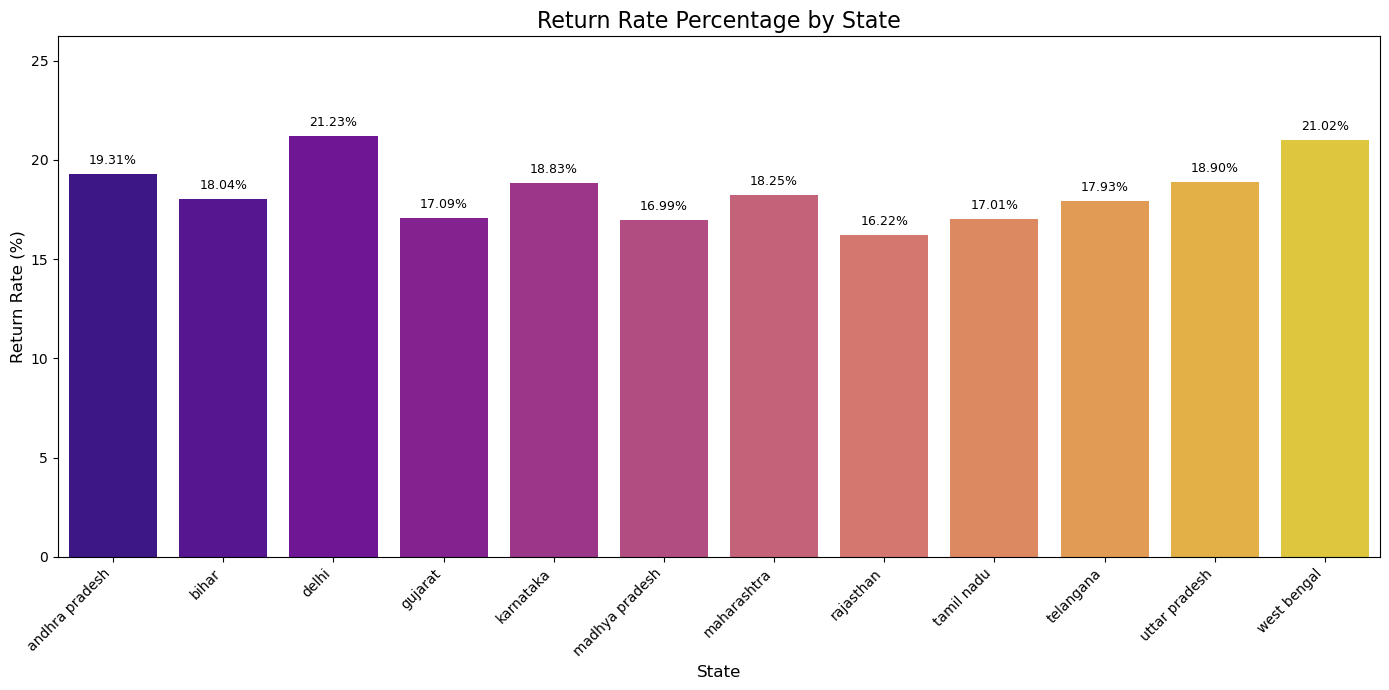

In [22]:
plt.figure(figsize=(14, 7))  # Wider figure to accommodate more states
sns.barplot(x='state', y='return_rate_percent', data=state_merge, palette='plasma')
plt.title('Return Rate Percentage by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.ylim(0, state_merge['return_rate_percent'].max() + 5)
plt.xticks(rotation=45, ha='right')

# Annotate bars
for bar, rate in zip(plt.gca().patches, state_merge['return_rate_percent']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f"{rate:.2f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# Over all Return Rate Percentage

In [24]:
# Merge orders + products on or_id
orders_products = pd.merge(odr, prd, on="or_id", how="left")

# Merge with customers to get 'state'
orders_products_customers = pd.merge(orders_products, cu[['c_id', 'state']], on="c_id", how="left")

# Add 'returned' flag
orders_products_customers["returned"] = orders_products_customers["or_id"].isin(rt_rf["or_id"]).astype(int)

# Group by state, category, sup_id
grouped = orders_products_customers.groupby(["state", "category", "sup_id"]).agg(
    total_orders=("or_id", "nunique"),
    returned_orders=("returned", "sum")
).reset_index()

# Calculate return rate
grouped["return_rate_percent"] = (grouped["returned_orders"] / grouped["total_orders"]) * 100
grouped["return_rate_percent"] = grouped["return_rate_percent"].round(2)

# Merge with suppliers to get sup_name
grouped_named = pd.merge(grouped, sup, on="sup_id", how="left")

#  Reorder and drop sup_id
final_df = grouped_named[["state", "category", "sup_name", "total_orders", "returned_orders", "return_rate_percent"]]
print(final_df.head())
final_df.to_csv("return_rate_by_state_category_suppliername.csv", index=False)

            state category               sup_name  total_orders  \
0  andhra pradesh    books   global ecom supplies             2   
1  andhra pradesh    books     primelogix traders             2   
2  andhra pradesh    books  digicart distributors             3   
3  andhra pradesh    books        urbanmarket co.             6   
4  andhra pradesh    books      ezyshop solutions             1   

   returned_orders  return_rate_percent  
0                1                50.00  
1                0                 0.00  
2                1                33.33  
3                0                 0.00  
4                0                 0.00  


In [25]:
final_df.to_sql('return_rate',conn,index=False,if_exists='replace')
query = """
        select category,avg(return_rate_percent)
        from return_rate
        group by category
"""


In [26]:
df= pd.read_sql_query(query,conn)
print(df)

         category  avg(return_rate_percent)
0           books                 15.143000
1     electronics                 20.206229
2         fashion                 19.090852
3         fitness                 18.488531
4  home appliance                 18.103116


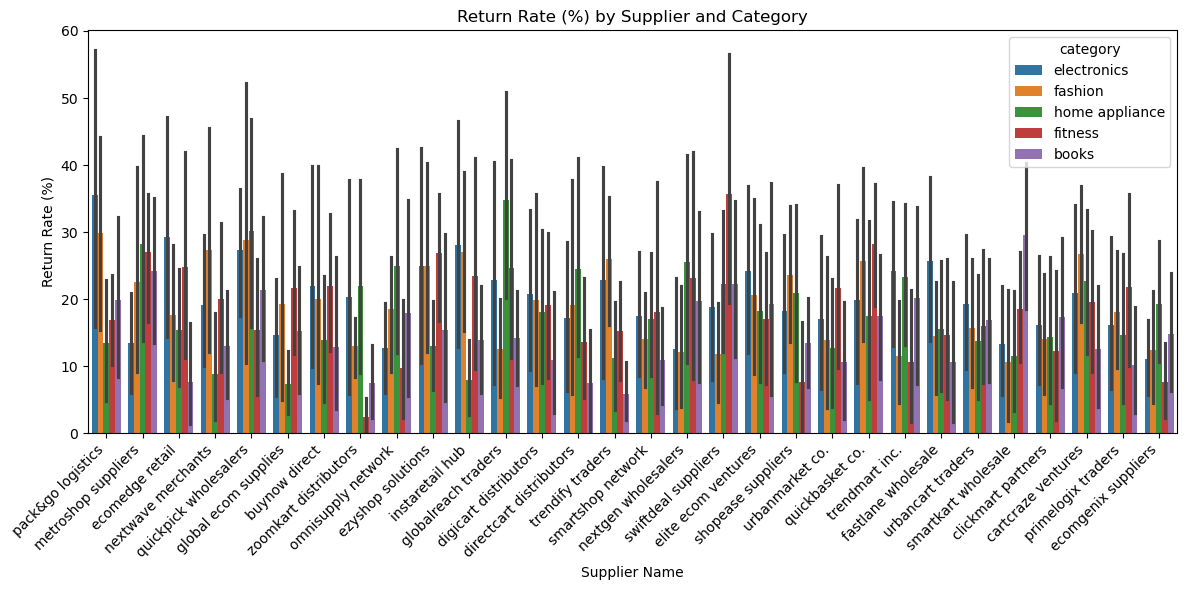

In [27]:
final_df_sorted = final_df.sort_values("return_rate_percent", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=final_df_sorted,
    x="sup_name",
    y="return_rate_percent",
    hue="category", 
    dodge=True
)
plt.title("Return Rate (%) by Supplier and Category")
plt.ylabel("Return Rate (%)")
plt.xlabel("Supplier Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


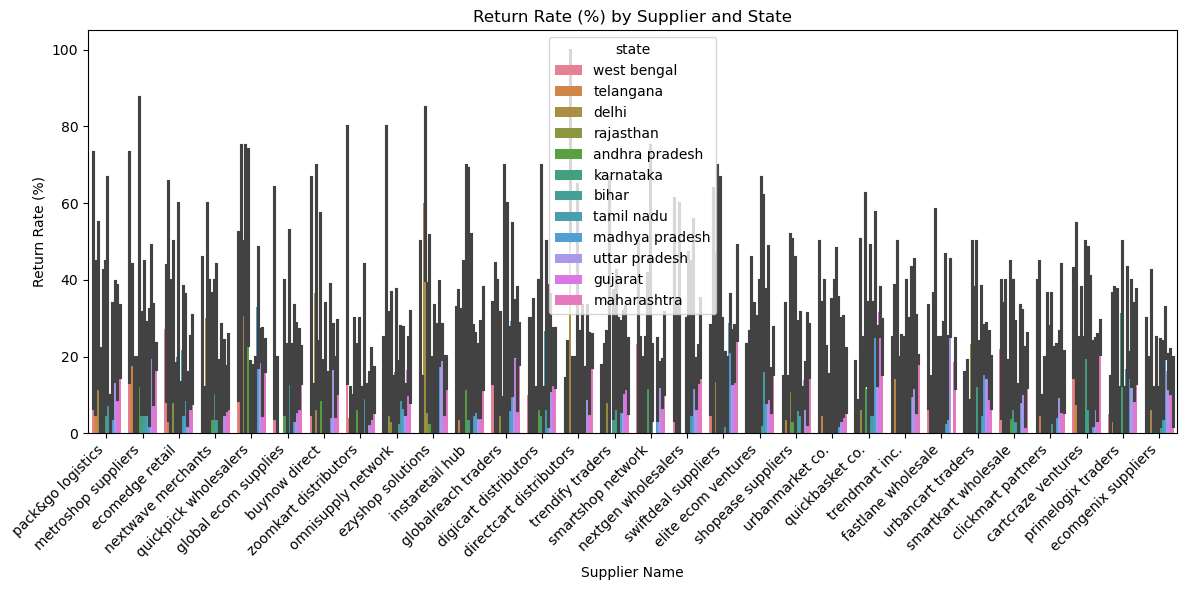

In [28]:
final_df_sorted = final_df.sort_values("return_rate_percent", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=final_df_sorted,
    x="sup_name",
    y="return_rate_percent",
    hue="state", 
    dodge=True
)
plt.title("Return Rate (%) by Supplier and State")
plt.ylabel("Return Rate (%)")
plt.xlabel("Supplier Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
